<a href="https://colab.research.google.com/github/AditiCoderElite/Logistic-Regression---Multi-Class-Classification/blob/main/Logistic_Regression_Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression - Multi-Class Classification

**Dataset Description:**

The dataset used in this problem statement involves the classification of samples of different glasses based on their physical and chemical properties. They are as follows:

1. **RI:** Refractive Index

2. **Na:** Sodium

3. **Mg:** Magnesium

4. **Al:** Aluminum

5. **Si:** Silicon

6. **K:** Potassium

7. **Ca:** Calcium

8. **Ba:** Barium

9. **Fe:** Iron

The chemical compositions are measured as the weight per cent in the corresponding oxide such as $\text{Na}_2\text{O}$, $\text{Al}_2\text{O}_3$, $\text{Si}\text{O}_2$ etc.

There are seven types (classes or labels) of glass listed; they are:

* **Class 1:** used for making building windows (float processed)

* **Class 2:** used for making building windows (non-float processed)

* **Class 3:** used for making vehicle windows (float processed)

* **Class 4:** used for making vehicle windows (non-float processed)

* **Class 5:** used for making containers

* **Class 6:** used for making tableware

* **Class 7:** used for making headlamps

A float-type glass refers to the process used to make the glass. The molten glass is introduced into a bath of molten tin, causing the glass to float freely. These glasses are used to absorb heat and UV rays.

**Dataset credits:** https://archive.ics.uci.edu/ml/datasets/Glass+Identification

**Citation:** Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


file_path = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/glass-types.csv'
df = pd.read_csv(file_path, header = None)


df.drop(columns = 0, inplace = True)


column_headers = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']


columns_dict = {}
for i in df.columns:
  columns_dict[i] = column_headers[i - 1]


df.rename(columns_dict, axis = 1, inplace = True)


print(df.head(), "\n")

print(df.info(), "\n")

print(df['GlassType'].value_counts(), "\n")

round(df['GlassType'].value_counts() * 100 / df.shape[0], 2)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  GlassType
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0          1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0          1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0          1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0          1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0          1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RI         214 non-null    float64
 1   Na         214 non-null    float64
 2   Mg         214 non-null    float64
 3   Al         214 non-null    float64
 4   Si         214 non-null    float64
 5   K          214 non-null    float64
 6   Ca         214 non-null    float64
 7   Ba         214 non-null    float64
 8   Fe         214 non-null    float64
 9   GlassType  214 non-null    i

GlassType
2    35.51
1    32.71
7    13.55
3     7.94
5     6.07
6     4.21
Name: count, dtype: float64

---

#### Preliminary Model Building


In [2]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1]
print(f"First five rows of the features data-frame:\n{x.head()}\n")

y = df['GlassType']
print(f"First five rows of the GlassType column:\n{y.head()}")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

First five rows of the features data-frame:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

First five rows of the GlassType column:
0    1
1    1
2    1
3    1
4    1
Name: GlassType, dtype: int64


In [3]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression()

lg_clf.fit(x_train, y_train)

lg_clf.score(x_train, y_train)

0.6174496644295302

The accuracy score of the preliminary multi-class classification model built using logistic regression is 61.75%

In [4]:
y_train_predict = lg_clf.predict(x_train)
y_train_predict = pd.Series(y_train_predict)

print("Classes or labels identified by the logistic regression model:\n", y_train_predict.unique())
print("\nCount of the labels identified by the logistic regression model:")
print(y_train_predict.value_counts())

Classes or labels identified by the logistic regression model:
 [2 1 6 5 7]

Count of the labels identified by the logistic regression model:
2    63
1    62
7    18
6     3
5     3
Name: count, dtype: int64


Class `3` for the train set is not identified by the model built.

In [5]:
y_test_predict = pd.Series(lg_clf.predict(x_test))

print("Classes or labels identified by the logistic regression model on the test set:\n", y_test_predict.unique())
print("\nCount of the labels identified by the logistic regression model on the test set:")
print(y_test_predict.value_counts())

Classes or labels identified by the logistic regression model on the test set:
 [1 7 2 5]

Count of the labels identified by the logistic regression model on the test set:
2    29
1    22
7    13
5     1
Name: count, dtype: int64


Classes `2` and `3` for the test set are not identified by the model built.

---

#### Oversampling Using SMOTE



In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = "all", random_state = 42)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [7]:
print(type(x_train), x_train.shape)
print(type(x_train_resampled), x_train_resampled.shape)
print(type(y_train_resampled), y_train_resampled.shape)

<class 'pandas.core.frame.DataFrame'> (149, 9)
<class 'pandas.core.frame.DataFrame'> (318, 9)
<class 'pandas.core.series.Series'> (318,)


In [8]:
y_train_resampled.value_counts()

GlassType
2    53
1    53
6    53
5    53
3    53
7    53
Name: count, dtype: int64

---

In [9]:
lg_clf2 = LogisticRegression()

lg_clf2.fit(x_train_resampled, y_train_resampled)

lg_clf2.score(x_train_resampled, y_train_resampled)

0.720125786163522

So before resampling the train set, the model accuracy was 61.75% approx. After resampling, the accuracy score has increased to 72.01% approx. So clearly, the resampling technique has improved the overall accuracy of the model. However, let's just check again whether all the classes are identified or not.


In [10]:
y_train_resampled_pred = pd.Series(lg_clf2.predict(x_train_resampled))
y_train_resampled_pred.value_counts()

1    60
6    59
5    56
3    49
2    47
7    47
Name: count, dtype: int64

The logistic regression model has identified all the classes in the train set.
Let's also look at how a confusion matrix would look like in the case of multi-class classification.

---

#### Multi-class Classification Confusion Matrix and Classification Report

The layout of the confusion matrix in this case (or in general, in the case of multi-class classification) should be as follows:


||Predicted Class `1`|Predicted Class `2`|Predicted Class `3`|Predicted Class `5`|Predicted Class `6`|Predicted Class `7`|
|-|-|-|-|-|-|-|
|Actual Class `1`|TP||||||
|Actual Class `2`||TP|||||
|Actual Class `3`|||TP||||
|Actual Class `5`||||TP|||
|Actual Class `6`|||||TP||
|Actual Class `7`||||||TP|


So the confusion matrix should have 6 rows and 6 columns because there are 6 classes (1, 2, 3, 5, 6 and 7) to be identified.

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_train_resampled, y_train_resampled_pred)
conf_matrix

array([[32,  8, 13,  0,  0,  0],
       [10, 24, 11,  3,  5,  0],
       [18, 11, 24,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  2],
       [ 0,  0,  0,  0, 53,  0],
       [ 0,  4,  1,  2,  1, 45]])

The diagonal elements in the confusion matrix are the true positive values. So according to the above confusion matrix obtained:

- 32 values of class `1` are **correctly** predicted as class `1` and 8 and 13 values are incorrectly predicted as class `2` and class `3` respectively.

- 24 values of class `2` are **correctly** predicted as class `2` and 10, 11, 3 and 5 values are incorrectly predicted as class `1`, class `3`, class `5` and class `6` respectively.

- 24 values of class `3` are **correctly** predicted as class `3` and 18 and 11 values are incorrectly predicted as class `1` and class `2` respectively.

- 51 values of class `5` are **correctly** predicted as class `5` and 2 values are incorrectly predicted as class `7`.

- 53 values of class `6` are **correctly** predicted as class `6`.

- 45 values of class `7` are **correctly** predicted as class `7` and 4, 1, 2 and 1 values are incorrectly predicted as class `2`, class `3`, class `5` and class `6` respectively.



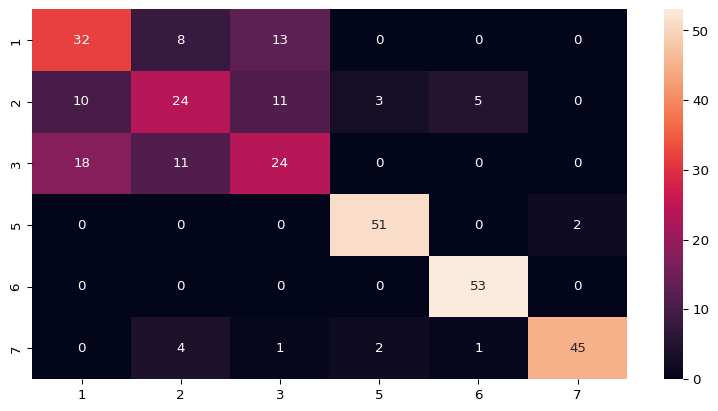

In [12]:
labels = pd.Series(y_train_resampled).sort_values(ascending = True).unique()

cm_df = pd.DataFrame(conf_matrix, columns = labels, index = labels)

plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(cm_df, annot = True)
plt.show()

In [13]:
print(classification_report(y_train_resampled, y_train_resampled_pred))

              precision    recall  f1-score   support

           1       0.53      0.60      0.57        53
           2       0.51      0.45      0.48        53
           3       0.49      0.45      0.47        53
           5       0.91      0.96      0.94        53
           6       0.90      1.00      0.95        53
           7       0.96      0.85      0.90        53

    accuracy                           0.72       318
   macro avg       0.72      0.72      0.72       318
weighted avg       0.72      0.72      0.72       318



So for classes `1, 2` and `3`, the f1-scores are less than 0.60 because of which the overall accuracy of the model is 72.01%

---


#### Building Random Forest Classifier Model


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()


rf_clf.fit(x_train, y_train)

rf_clf.score(x_train, y_train)

1.0

So the accuracy score obtained is 100% on the train set. Let's make a confusion matrix and print the f1-scores.

In [15]:
rf_y_train_pred = pd.Series(rf_clf.predict(x_train))
rf_y_train_pred.value_counts()

2    53
1    51
7    19
3    13
5     7
6     6
Name: count, dtype: int64

So all the classes have been identified which is expected because the accuracy score is 1.

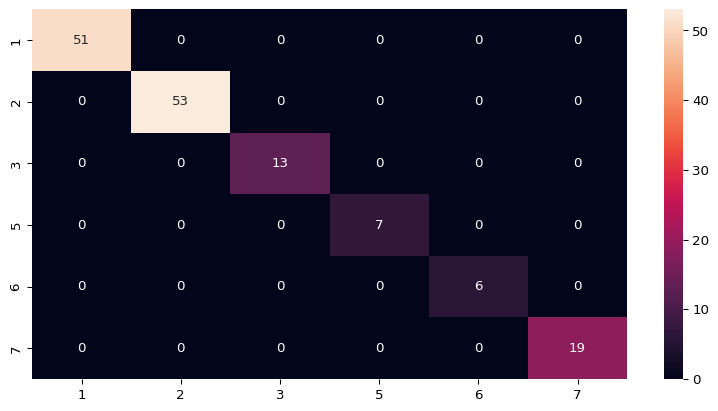

In [16]:
rf_train_conf_matrix = confusion_matrix(y_train, rf_y_train_pred)

rf_train_cm_df = pd.DataFrame(rf_train_conf_matrix, columns = labels, index = labels)

plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(rf_train_cm_df, annot = True)
plt.show()

The above confusion matrix contains only true positive values. So we don't need to calculate the f1-scores because they all will be 1 for all the glass-types. So let's create a confusion matrix and calculate f1-scores for the test set.

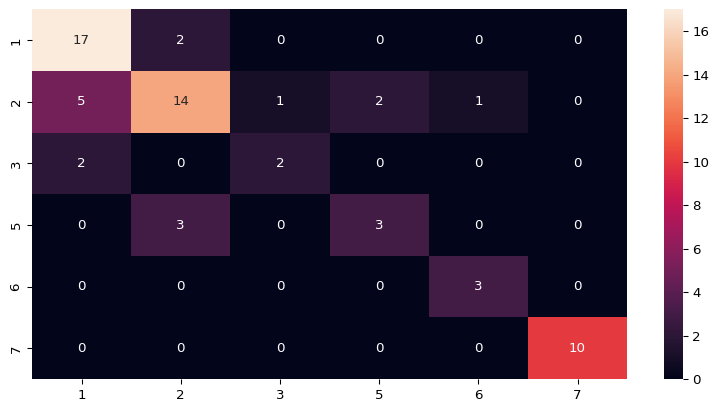

In [17]:
rf_y_test_pred = pd.Series(rf_clf.predict(x_test))

rf_test_conf_matrix = confusion_matrix(y_test, rf_y_test_pred)

rf_test_cm_df = pd.DataFrame(rf_test_conf_matrix, columns = labels, index = labels)

plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(rf_test_cm_df, annot = True)
plt.show()

From the confusion matrix, we can see that there is some misclassification. Let's print the f1-scores for the test set values.

In [18]:
print(classification_report(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

           1       0.71      0.89      0.79        19
           2       0.74      0.61      0.67        23
           3       0.67      0.50      0.57         4
           5       0.60      0.50      0.55         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.75        65
   macro avg       0.74      0.75      0.74        65
weighted avg       0.75      0.75      0.75        65



So the f1-score is low only for class `3` maybe because it is a minority class. The random forest classifier is working well for all other classes on the non-resampled dataset because for all the labels, the f1-scores are greater than 0.50.

Let's see how it performs when we build it again on the resampled train set.

In [19]:
rf_clf_res = RandomForestClassifier()

rf_clf_res.fit(x_train_resampled, y_train_resampled)


rf_clf_res.score(x_train_resampled, y_train_resampled)

1.0

The accuracy score is almost 100% in this case.

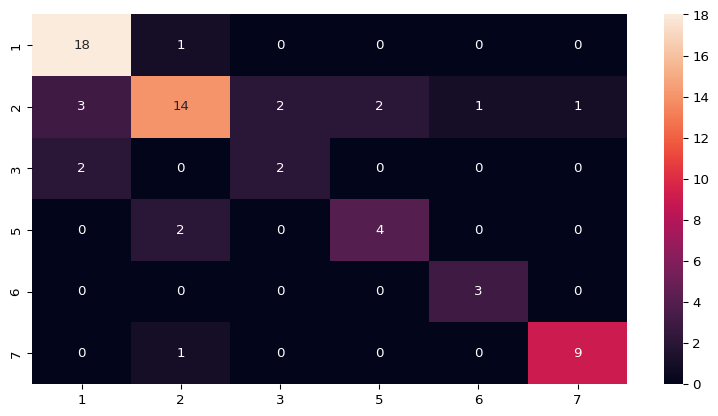

In [20]:
rf_y_test_pred_res = pd.Series(rf_clf_res.predict(x_test))

rf_test_conf_matrix_res = confusion_matrix(y_test, rf_y_test_pred_res)


rf_test_cm_df_res = pd.DataFrame(rf_test_conf_matrix_res, columns = labels, index = labels)

plt.figure(figsize = (10, 5), dpi = 96)
sns.heatmap(rf_test_cm_df_res, annot = True)
plt.show()

From the above confusion matrix, we can see that there is some misclassification of the classes for the test set.

Let's print the classification report to see if there is any further improvement in the f1-scores especially for class `3`.

In [21]:
print(classification_report(y_test, rf_y_test_pred_res))

              precision    recall  f1-score   support

           1       0.78      0.95      0.86        19
           2       0.78      0.61      0.68        23
           3       0.50      0.50      0.50         4
           5       0.67      0.67      0.67         6
           6       0.75      1.00      0.86         3
           7       0.90      0.90      0.90        10

    accuracy                           0.77        65
   macro avg       0.73      0.77      0.74        65
weighted avg       0.77      0.77      0.76        65



From the classification report, we can see that the f1-scores have decreased probably because of oversampling in the case of the random forest classifier based multi-class classification model. Hence, the previous random forest classifier model (without oversampling) is the most accurate one for this problem statement.



---